# Statistical Modeling RAMA Data Project 

This project aims to study the relationship between several atmospheric parameters and the possibility to predict the temperature using a statistical model. 
The data was obtained from the [Red Automática de Monitoreo Atmosférico] (RAMA)(http://www.aire.cdmx.gob.mx/default.php?opc=%27aKBh%27)) a database from the Mexico government , the data is collected daily every hour and from several parts of the mexico city, for this project the data from the Cuauhtemoc area will be used.

The data contains parameters such as:

+ Carbon monoxide CO[ppm] 
+ Nitrogen  monoxide NO[ppb] 
+ Nitrogen dioxide NO2[ppb]
+ Ozone O3[ppb]
+ Sulfur dioxide SO2[ppb]
+ Particules PM10[micro-g/m3]
+ Relative humidity RH[%]
+ Wind direction (WDR)[°azimut]
+ Wind speed (WSP)[m/s]
+ Temperature (TEMP)[°C]

The data will be cleaned and analyzed using R.

The first step is to load the libraries needed to perform the EDA on the dataset.

In [74]:
#Libraries needed

library(purrr)
library(tidyr)
library(ggplot2)
library(dplyr) 
library(readxl)
install.packages('corrplot')
library(corrplot)
library(mgcv)


  There is a binary version available but the source version is later:
         binary source needs_compilation
corrplot   0.88   0.92             FALSE



installing the source package 'corrplot'

Loading required package: nlme

Attaching package: 'nlme'

The following object is masked from 'package:dplyr':

    collapse

This is mgcv 1.8-28. For overview type 'help("mgcv-package")'.


The dataset loaded in R were gathered before using Microsoft Excel and exported as shown here. 

In [4]:
#Datasets per year to model

DATOS17 = read_excel("C:/Users/oswal/Documentos/rama/17RAMA/DATOS17.xlsx", 
    col_types = c("date", "numeric", "numeric", 
        "numeric", "numeric", "numeric", 
        "numeric", "numeric", "numeric", 
        "numeric", "numeric", "numeric"))
DATOS18 = read_excel("C:/Users/oswal/Documentos/rama/18RAMA/DATOS18.xlsx", 
    col_types = c("date", "numeric", "numeric", 
        "numeric", "numeric", "numeric", 
        "numeric", "numeric", "numeric", 
        "numeric", "numeric", "numeric"))
DATOS19 = read_excel("C:/Users/oswal/Documentos/rama/19RAMA/DATOS19.xlsx", 
    col_types = c("date", "numeric", "numeric", 
        "numeric", "numeric", "numeric", 
        "numeric", "numeric", "numeric", 
        "numeric", "numeric", "numeric"))
DATOS20 = read_excel("C:/Users/oswal/Documentos/rama/20RAMA/DATOS20.xlsx", 
    col_types = c("date", "numeric", "numeric", 
        "numeric", "numeric", "numeric", 
        "numeric", "numeric", "numeric", 
        "numeric", "numeric", "numeric"))
DATOS21 = read_excel("C:/Users/oswal/Documentos/rama/21RAMA/DATOS21.xlsx", 
    col_types = c("date", "numeric", "numeric", 
        "numeric", "numeric", "numeric", 
        "numeric", "numeric", "numeric", 
        "numeric", "numeric", "numeric"))
DATOS22 = read_excel("C:/Users/oswal/Documentos/rama/22RAMA/DATOS22.xlsx", 
    col_types = c("date", "numeric", "numeric", 
        "numeric", "numeric", "numeric", 
        "numeric", "numeric", "numeric", 
        "numeric", "numeric", "numeric"))

In [7]:
#Combination of the datasets loaded in one

df = bind_rows(DATOS17,DATOS18,DATOS19,DATOS20,DATOS21,DATOS22)
dim(df)
head(df)

[1] 52584    13

FECHA,HORA,CO,NO,NO2,O3,PM10,SO2,WDR,WSP,RH,TEMP,WRD
2017-01-01,1,0.5,2,10,29,46,2,268,2.2,69,10.4,NA
2017-01-01,2,0.6,3,11,29,56,2,263,2.5,68,10.3,NA
2017-01-01,3,0.7,3,15,26,49,2,262,1.9,67,10.6,NA
2017-01-01,4,0.6,2,11,28,57,2,265,1.9,69,10.2,NA
2017-01-01,5,0.5,2,8,29,40,1,263,1.9,70,9.7,NA
2017-01-01,6,0.5,1,7,30,28,1,262,1.9,70,9.3,NA


The data presents Na values as -99, so They will be deleated.

In [9]:
# Switch -99 value for NA

df[df == -99] = NA
df = subset(df, select = -c(WRD) )
summary(df)
dim(df)

     FECHA                 HORA             CO              NO         
 Min.   :2017-01-01   Min.   : 1.00   Min.   :0.000   Min.   :  0.000  
 1st Qu.:2018-07-02   1st Qu.: 6.75   1st Qu.:0.200   1st Qu.:  1.000  
 Median :2020-01-01   Median :12.50   Median :0.300   Median :  3.000  
 Mean   :2020-01-01   Mean   :12.50   Mean   :0.344   Mean   :  8.212  
 3rd Qu.:2021-07-02   3rd Qu.:18.25   3rd Qu.:0.440   3rd Qu.:  7.000  
 Max.   :2022-12-31   Max.   :24.00   Max.   :3.000   Max.   :257.000  
                                      NA's   :10131   NA's   :12569    
      NO2               O3              PM10             SO2         
 Min.   :  1.00   Min.   :  0.00   Min.   :  1.00   Min.   :  0.000  
 1st Qu.: 12.00   1st Qu.: 16.00   1st Qu.: 20.00   1st Qu.:  1.000  
 Median : 17.00   Median : 28.00   Median : 30.00   Median :  1.000  
 Mean   : 20.09   Mean   : 33.28   Mean   : 32.48   Mean   :  3.017  
 3rd Qu.: 26.00   3rd Qu.: 46.00   3rd Qu.: 42.00   3rd Qu.:  3.000  
 Max

[1] 52584    12

The parameters wind speed (WSP) and wind direction (WDR) will be drop from the work dataset as they present a lot of NA values.

In [21]:
# Making the dataset to wotk with

dt = subset(df, select = -c(FECHA,HORA, WDR, WSP))
dt = na.omit(dt)
dim(dt)
summary(dt)

[1] 23940     8

       CO               NO               NO2               O3        
 Min.   :0.0000   Min.   :  0.000   Min.   :  2.00   Min.   :  0.00  
 1st Qu.:0.2000   1st Qu.:  1.000   1st Qu.: 13.00   1st Qu.: 15.00  
 Median :0.3000   Median :  3.000   Median : 20.00   Median : 27.00  
 Mean   :0.3834   Mean   :  9.322   Mean   : 22.08   Mean   : 31.86  
 3rd Qu.:0.5000   3rd Qu.:  8.000   3rd Qu.: 29.00   3rd Qu.: 44.00  
 Max.   :3.0000   Max.   :257.000   Max.   :131.00   Max.   :141.00  
      PM10             SO2                RH             TEMP      
 Min.   :  1.00   Min.   :  0.000   Min.   : 2.00   Min.   :-4.10  
 1st Qu.: 20.00   1st Qu.:  1.000   1st Qu.:38.00   1st Qu.:11.70  
 Median : 31.00   Median :  2.000   Median :55.00   Median :14.00  
 Mean   : 33.17   Mean   :  3.578   Mean   :54.57   Mean   :14.43  
 3rd Qu.: 43.00   3rd Qu.:  4.000   3rd Qu.:72.00   3rd Qu.:17.10  
 Max.   :244.00   Max.   :122.000   Max.   :94.00   Max.   :27.50  

The dataset “dt” will be visually explored to find outliers and the possible relationship between the parameters and according to that a model will be built.

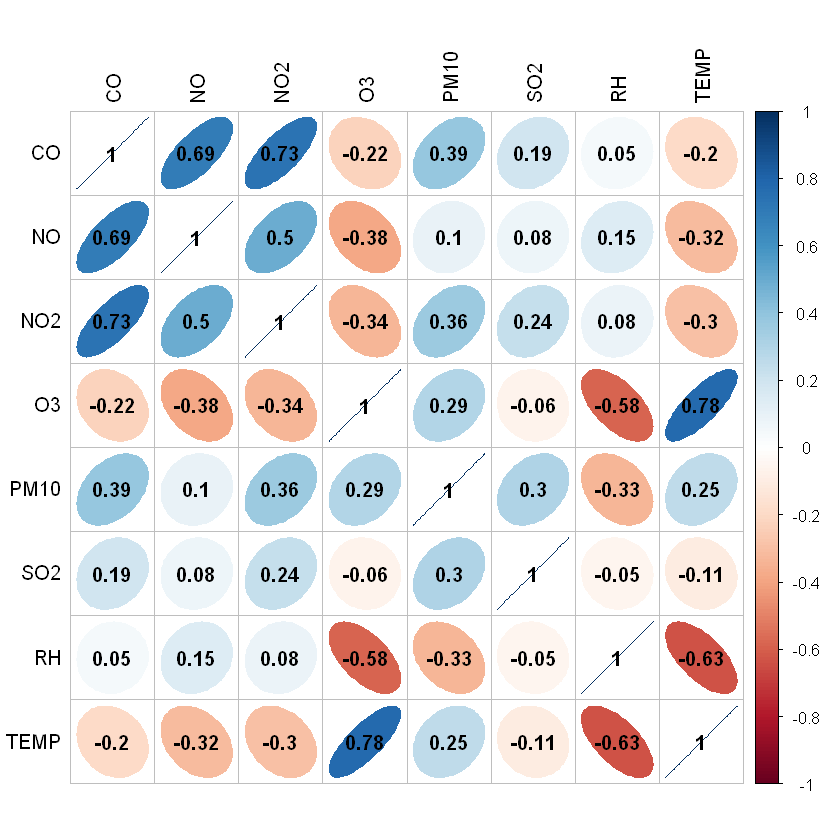

In [26]:
# Correlation matrix for the dataset

corrplot(cor(dt),method = "ellipse",addCoef.col = "black",tl.col = "black")

The main goal of this project is to try to predict the temperature value using all the other parameters as predictors, in the correlation matrix there's some evidence of strong relationship between the temperature and the ozone concentration (O3) and the relative humidity (RH), a slightly relationship with the other parameters such as: nitrogen monoxide (NO), nitrogen dioxide (NO2) and particles PM10, the relationship with carbon monoxide (CO) presentes a slight smaller value, and finally the sulfur dioxide has the lowest value of correlation.
All of these predictors are important for air quality, therefore their presence in the environment has a crucial impact on the temperature, so the model will be tested for all the reported parameters.
 

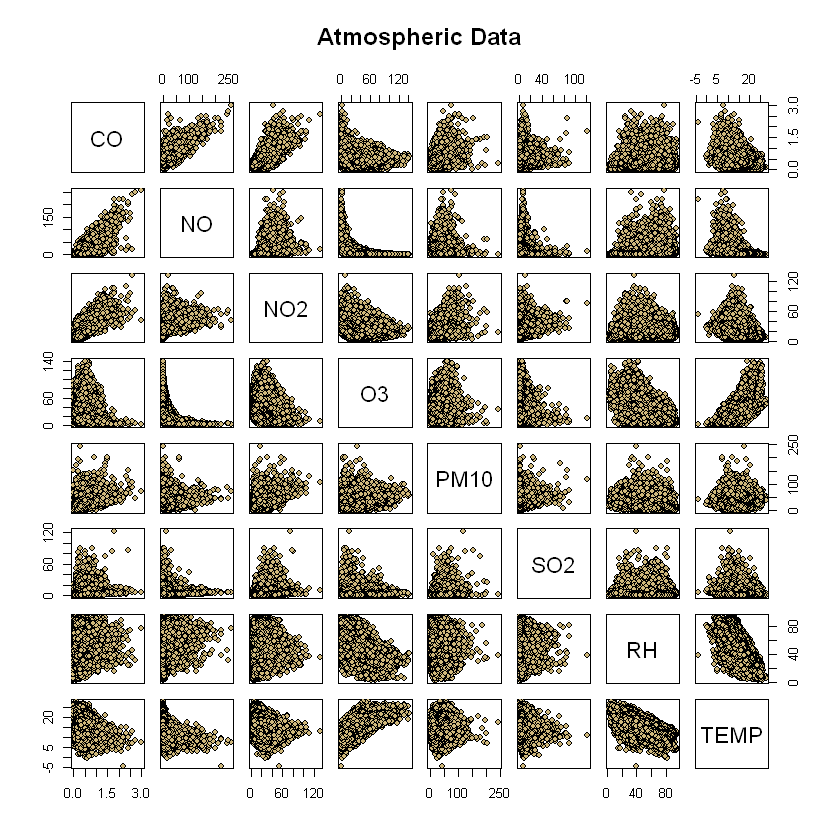

In [27]:
# pairwise relationship
pairs(dt, main = "Atmospheric Data", pch = 21,bg = c("#CFB87C"))

The pairwise plots do not show a clear tendency of the predictor Vs the temperature (response), so maybe a linear model will not be enough to model this data.

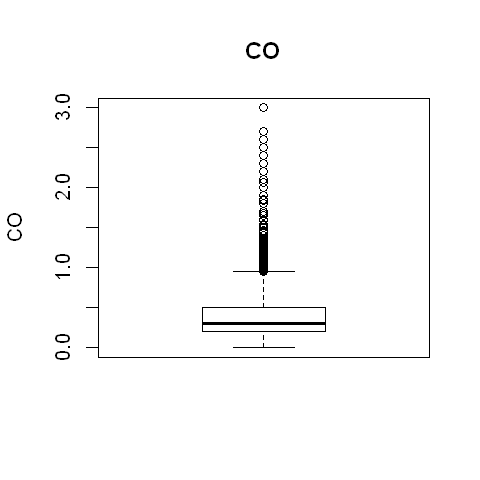

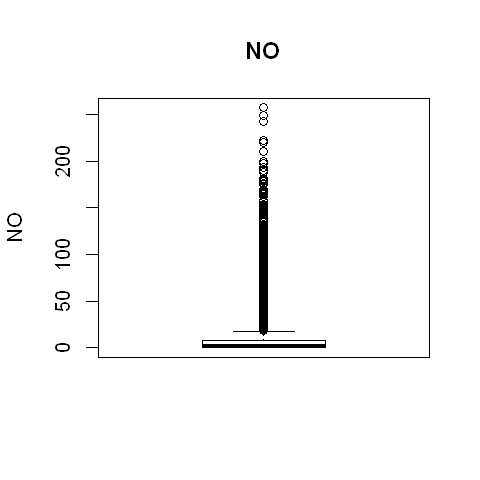

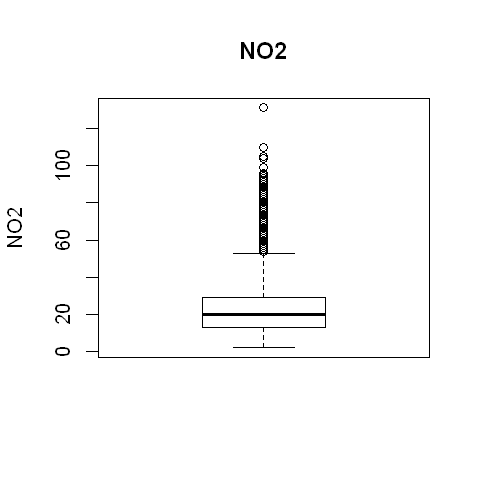

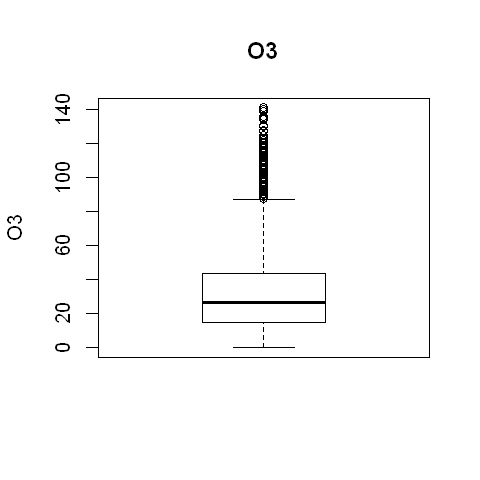

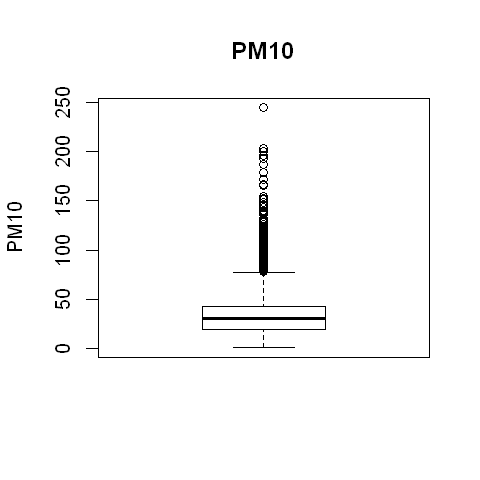

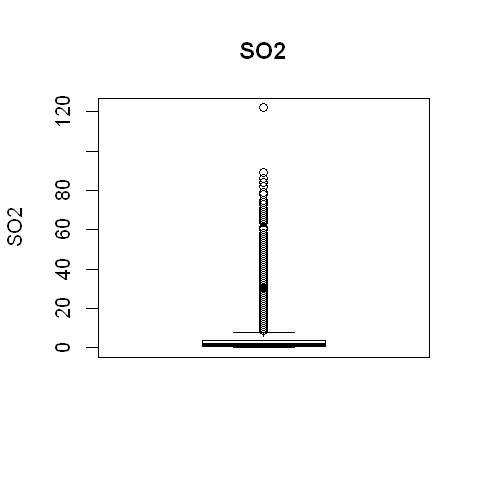

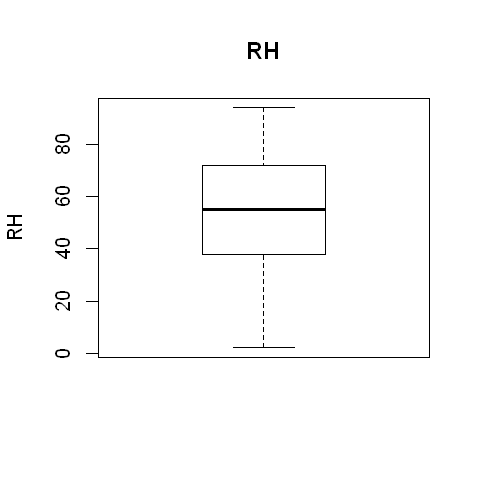

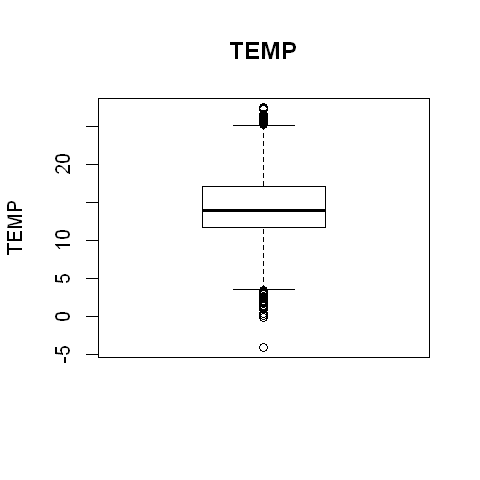

In [40]:
#boxplots for variables 
for(i in 1:8){ boxplot(dt[,i], main=names(dt)[i], ylab=names(dt)[i] )
             options(repr.plot.width=4, repr.plot.height=4)}

The boxplots showed a lot of outliers in the dataset, if the outliers are removed the amount of data will be strongly reduced, for that reason the data will be used as it is.
To build the model the dataset will be separated into a train (80%) and test (20%) sets. 


In [43]:
#Dataset partition
set.seed(1991) 
n = floor(0.8 * nrow(dt))

index = sample(seq_len(nrow(dt)), size = n) 

train_df = dt[index, ]

test_df = dt[-index, ] 

dim(test_df) 
dim(train_df) 
head(train_df)

[1] 4788    8

[1] 19152     8

CO,NO,NO2,O3,PM10,SO2,RH,TEMP
0.2,7,11,34,23,1,74,14.3
0.1,1,13,23,13,1,80,9.7
0.5,8,14,36,32,1,18,15.3
0.4,3,16,64,43,23,32,16.9
0.3,1,11,100,43,1,27,22.1
0.2,2,15,21,2,0,81,12.5


A classical linear model will be first tested in the data to have an idea of the possible final model.

In [44]:
# classical linear model 

lmod= lm(TEMP ~ CO + NO + NO2 + O3 + PM10 + SO2 + RH, train_df)
summary(lmod)


Call:
lm(formula = TEMP ~ CO + NO + NO2 + O3 + PM10 + SO2 + RH, data = train_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.4546  -1.3725   0.1849   1.5343   8.6109 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14.856021   0.092499 160.608  < 2e-16 ***
CO           0.447496   0.108769   4.114 3.90e-05 ***
NO          -0.009187   0.001327  -6.921 4.63e-12 ***
NO2         -0.026090   0.002112 -12.355  < 2e-16 ***
O3           0.094789   0.001030  92.022  < 2e-16 ***
PM10         0.008211   0.001139   7.211 5.74e-13 ***
SO2         -0.054939   0.002919 -18.820  < 2e-16 ***
RH          -0.055536   0.001013 -54.838  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.237 on 19144 degrees of freedom
Multiple R-squared:  0.6676,	Adjusted R-squared:  0.6675 
F-statistic:  5494 on 7 and 19144 DF,  p-value: < 2.2e-16


The summary for the linear model showed that all the parameters used are statistically significant, that means they contribute to the explanation of variability in the response (temperature) and all of them needed in the model.

The test dataset will be used to know the prediction power for the model built. 

In the first try the total (7) parameters available were used to model the data, to ensure that a possible model with less predictors from 1 to 7 predictors were studied, to perform this analysis the calculated parameters AIC, BIC and Radj are used.
In the AIC and BIC values the better model is the one with the smallest value, for the Radj the greatest value is associated with the best model.


In [98]:
install.packages('leaps')
library(leaps)

package 'leaps' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\oswal\AppData\Local\Temp\RtmpOm0rZE\downloaded_packages


Warning message:
"package 'leaps' was built under R version 3.6.3"

In [100]:
# Matrix of parameters
reg = regsubsets(TEMP ~ CO + NO + NO2 + O3 + PM10 + SO2 + RH, data=train_df, nvmax=7)
rs = summary(reg)
rs$which
names(rs)



(Intercept),CO,NO,NO2,O3,PM10,SO2,RH
TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE
TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE
TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE
TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE
TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

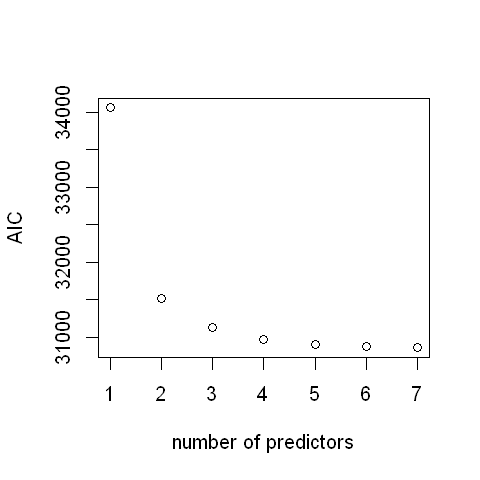

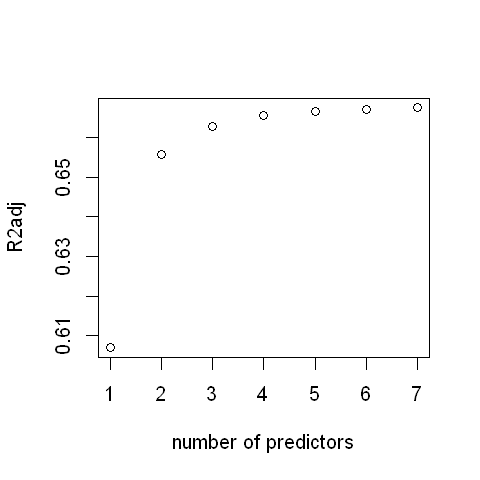

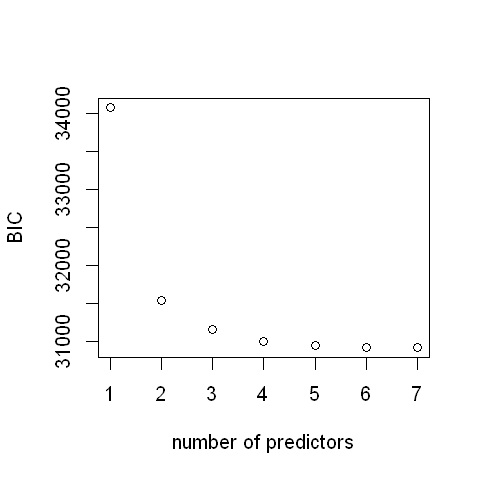

In [103]:
# plots for the AIC, BIC and Radj parameters

n=dim(train_df)[1]

aic=2*(2:8) + n*log(rs$rss/n)
plot(aic~I(1:7), xlab="number of predictors", ylab="AIC")

plot(1:7, rs$adjr2, xlab="number of predictors", ylab="R2adj")

bic=log(n)*(2:8) + n*log(rs$rss/n)
plot(bic~I(1:7), xlab="number of predictors", ylab="BIC")

The plots above showed that the best model is the one with the 7 predictors, this allow to conclude the model the model with 6 and 7 parameters are very close in values the only difference is the last predictor O3 tasted, this predictor is the one that have the strongest relationship according the correlation matrix.

One of the first ways to know how the model fits the data is the mean squared error (MSE), in this case the test set will be used, as it is data that the model do not know, and it is a good ways to determine the power of prediction for the model, also the plot for the real values Vs the predicted values is expected to be a straight line or at least have a linear trend.

[1] 4.931308

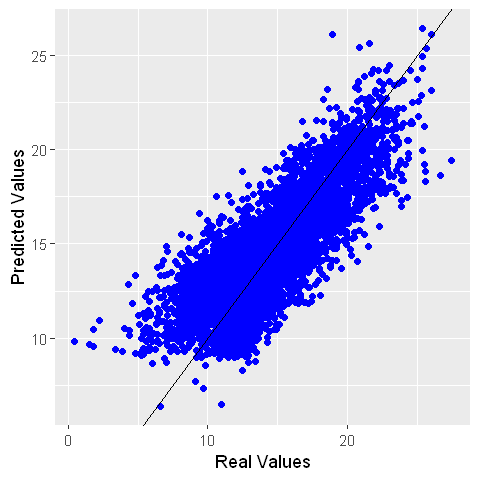

In [85]:
# prediction with the test data
lmod_pred = predict(lmod,test_df)
MSE_lmod= mean((test_df$TEMP - lmod_pred)^2)
MSE_lmod


# plot real values Vs predicted values
ggplot() +
  aes(x = test_df$TEMP, y=lmod_pred) +
  geom_point(color="blue") + labs(x='Real Values', y='Predicted Values') +
  geom_abline()

 

The results seemed to have the correct form as the relationship between the real and predicted data follows a linear trend.
Also the model will be compared against a general additive model as the pairwise plots did not show a linear relationship, and this type of model helps with this kind of relationships.

In [87]:
gam_mod= gam(TEMP ~ s(CO) + s(NO) + s(NO2) + s(O3) + s(PM10) + s(SO2) + s(RH), train_df, family =gaussian)
summary(gam_mod)



Family: gaussian 
Link function: identity 

Formula:
TEMP ~ s(CO) + s(NO) + s(NO2) + s(O3) + s(PM10) + s(SO2) + s(RH)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14.42770    0.01554   928.7   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
          edf Ref.df       F p-value    
s(CO)   8.010  8.599   13.94  <2e-16 ***
s(NO)   5.987  6.914   13.03  <2e-16 ***
s(NO2)  5.925  6.830   27.71  <2e-16 ***
s(O3)   7.311  8.081 1145.39  <2e-16 ***
s(PM10) 5.369  6.284   41.53  <2e-16 ***
s(SO2)  5.633  6.605  101.69  <2e-16 ***
s(RH)   6.267  7.363  371.33  <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.693   Deviance explained = 69.4%
GCV = 4.6333  Scale est. = 4.6223    n = 19152

The general additive model slightly improves the explanation and prediction compared with the classical linear model, this by modeling all the predictors as non-parametric using the smoothing method. This model also improved the statistical significance for the predictors.

[1] 4.586401

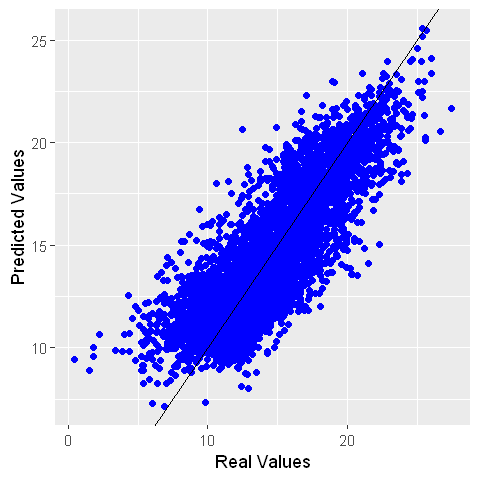

In [88]:
# prediction with the test data
gam_pred = predict(gam_mod,test_df)
MSE_gam= mean((test_df$TEMP - gam_pred)^2)
MSE_gam


#plot real values Vs predicted values
ggplot() +
  aes(x = test_df$TEMP, y=gam_pred) +
  geom_point(color="blue") + labs(x='Real Values', y='Predicted Values') +
  geom_abline()

To conclude, the models built for the atmospheric data (CO, NO, NO2, O3, PM10, SO2 and RH) from Mexico city can actually explain and predict the temperature.

+ The dataset was collected, clean and explored.
+ The outliers shown by the boxplots were conserved as the data is measured by a special equipment for detection, so It is hard to conclude if they are real outliers or there's something else causing the value.
+ All the predictors are statistically significant for the model as discussed earlier.
+ Both models offer almost the same results when tested with the test set, as shown by the MSE and the plot between real and predicted values.
+ The generalized additive model (GAM) was expected to improve the results more as the pairwise showed that the relationships were not linear.
